# Image processing and masking notes


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#cv2.imread('dog')

In [3]:
img11=cv2.imread('watermark.png')
img1=cv2.cvtColor(img11,cv2.COLOR_BGR2RGB)
img22=cv2.imread('dog_man.jpg')
img2=cv2.cvtColor(img22,cv2.COLOR_BGR2RGB)

In [6]:
img1.shape

(225, 224, 3)

In [7]:
img2.shape

(1390, 975, 3)

In [16]:
img1r=cv2.resize(img1,(300,300))

In [13]:
img2r=cv2.resize(img2,(300,300))

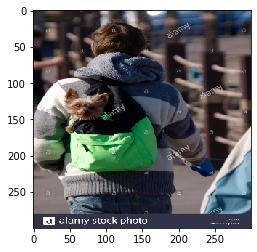

In [14]:
plt.imshow(img2r)

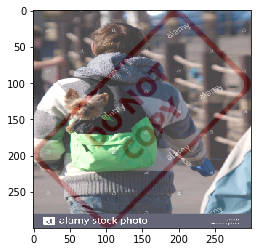

In [18]:
plt.imshow(cv2.addWeighted(img1r,0.2,img2r,0.8,10))

#  Resizing

In [26]:
im=cv2.resize(img1,(450,450))
x=img2.shape[0]-im.shape[0]
y=img2.shape[1]-im.shape[1]
img2[x:,y:]=im

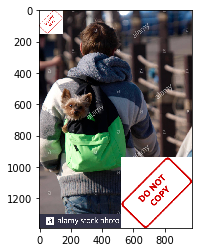

In [27]:
plt.imshow(img2)

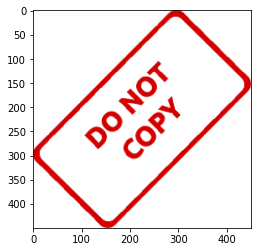

In [30]:
plt.imshow(img2[x:,y:])

# creating ROI and masking

In [56]:
img11=cv2.imread('watermark.png')
img1=cv2.cvtColor(img11,cv2.COLOR_BGR2RGB)
img22=cv2.imread('dog_man.jpg')
img2=cv2.cvtColor(img22,cv2.COLOR_BGR2RGB)

im1=cv2.resize(img1,(250,250))
im1.shape

(250, 250, 3)

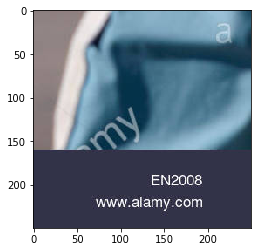

In [58]:

x=img2.shape[0]-im1.shape[0]
y=img2.shape[1]-im1.shape[1]


roi=img2[x:,y:]

plt.imshow(roi)

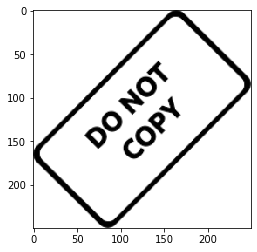

In [59]:
im2gray=cv2.cvtColor(im1,cv2.COLOR_RGB2GRAY)
plt.imshow(im2gray,cmap='gray')

In [60]:
im2gray.shape

(250, 250)

In [61]:
im1_inv=cv2.bitwise_not(im2gray)

In [65]:
im1_inv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

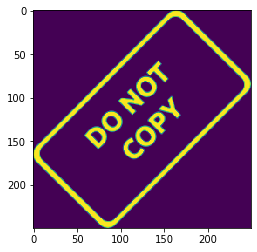

In [63]:
plt.imshow(im1_inv)

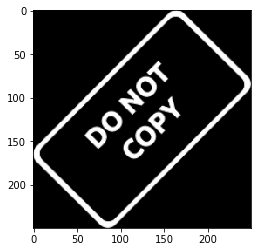

In [64]:
plt.imshow(im1_inv,cmap='gray')

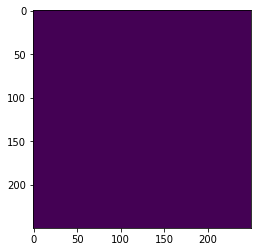

In [75]:
wh_bg=np.full(im1_inv.shape,255,np.uint8)
plt.imshow(wh_bg)

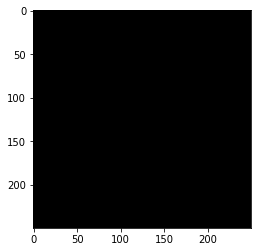

In [77]:
im1_f = cv2.bitwise_or(wh_bg,wh_bg,im1_inv)
plt.imshow(im1_f,cmap='gray')
#print(im1_f.shape)

In [78]:
fmas=cv2.bitwise_or(im1,im1,im1_inv)

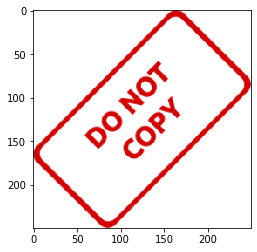

In [80]:
plt.imshow(fmas,cmap='gray')

####



## masking and blending



In [81]:
img11=cv2.imread('watermark.png')
img1=cv2.cvtColor(img11,cv2.COLOR_BGR2RGB)
img22=cv2.imread('dog_man.jpg')
img2=cv2.cvtColor(img22,cv2.COLOR_BGR2RGB)

im1=cv2.resize(img1,(250,250))
im1.shape

(250, 250, 3)

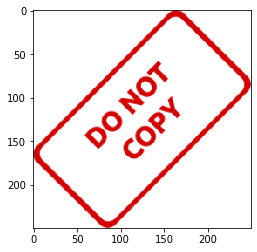

In [83]:
plt.imshow(im1)

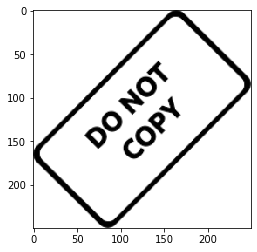

In [85]:
## covert to gray scale


im2gray=cv2.cvtColor(im1,cv2.COLOR_RGB2GRAY)
plt.imshow(im2gray,cmap='gray')

In [86]:
im2gray.shape

(250, 250)

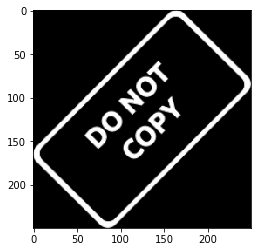

In [95]:
###Converting into white text 
im_dark=cv2.bitwise_not(im2gray)
plt.imshow(im_dark,cmap='gray')

(250, 250, 3)

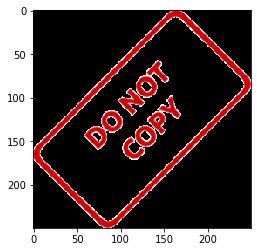

In [101]:
im1f=cv2.bitwise_or(im1,im1,mask=im_dark)
plt.imshow(im1f)
im1f.shape

In [108]:
## making roi:


x=img2.shape[0]-im1.shape[0]
y=img2.shape[1]-im1.shape[1]

roi=img2[x:,y:]
roi.shape

(250, 250, 3)

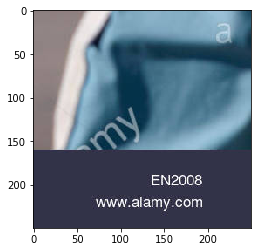

In [109]:
plt.imshow(roi)

In [113]:
iroi=cv2.bitwise_or(roi,im1f)
iroi.shape

(250, 250, 3)

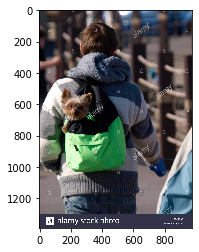

In [111]:
img2[x:,y:]

In [114]:
x=img2.shape[0]-iroi.shape[0]
y=img2.shape[1]-iroi.shape[1]

img2[x:,y:]=iroi

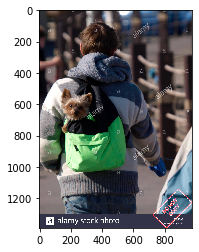

In [116]:
plt.imshow(img2)